In [23]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('titanic.csv')

In [14]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [21]:
df['Age'].mean()


29.471443066516347

In [43]:
mn = np.mean(df['Age'])

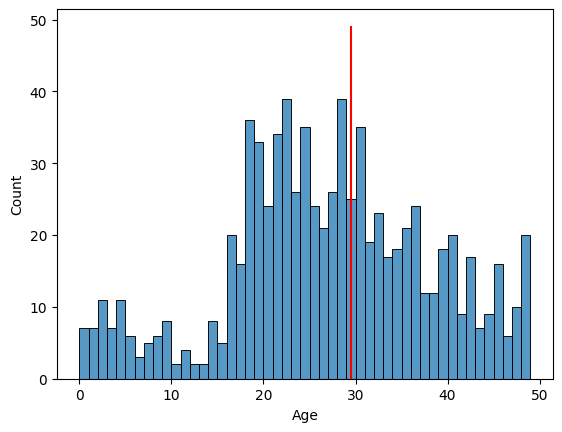

In [38]:
sns.histplot(x='Age',data=df,bins=[i for i in range(0,50)])
plt.plot([mn for i in range(0,50)],[i for i in range(0,50)],c='red')

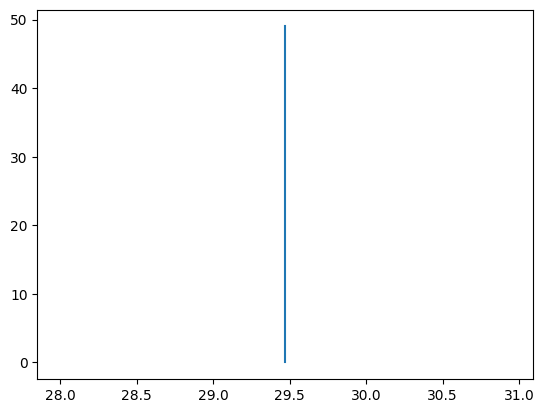

In [40]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [44]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [41]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
882    27.0
883    19.0
884     7.0
885    26.0
886    32.0
Name: Age, Length: 887, dtype: float64

In [45]:
np.median(df['Fare'])

14.4542

In [46]:
df['Fare'].mean()

32.30542018038331

In [51]:
me = np.mean(df['Fare'])

In [47]:
md = np.median(df['Fare'])

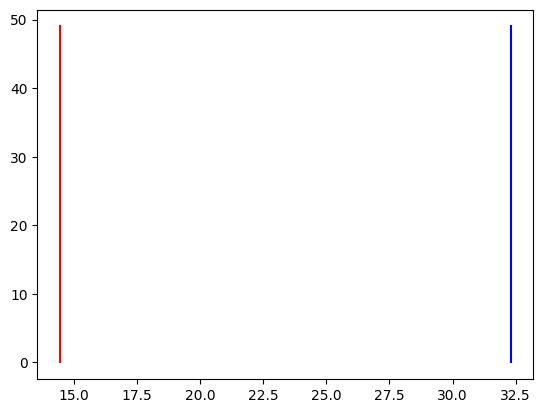

In [53]:
plt.plot([md for i in range(0,50)],[i for i in range(0,50)],c='red')
plt.plot([me for i in range(0,50)],[i for i in range(0,50)],c='blue')

Variability

In [54]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [57]:
min_r = df['Age'].min()
max_r = df['Age'].max()
range = max_r - min_r
range

79.58

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [62]:
df_corr = df.select_dtypes(["float64","int64"]).corr()

In [63]:
df_cov = df.select_dtypes(["float64","int64"]).cov()

<Axes: >

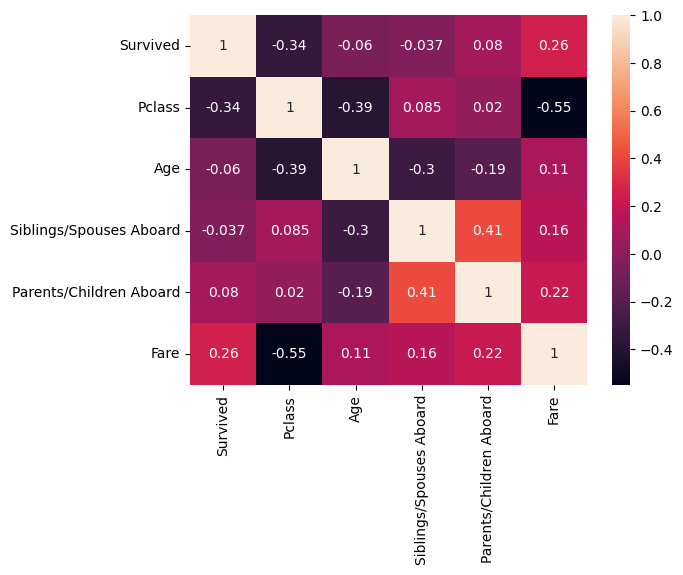

In [64]:
sns.heatmap(df_corr,annot=True)

<Axes: >

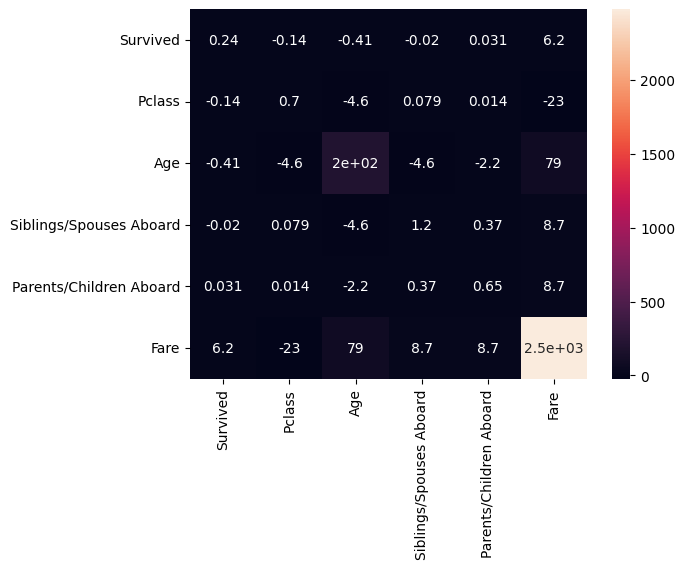

In [66]:
sns.heatmap(df_cov,annot=True)

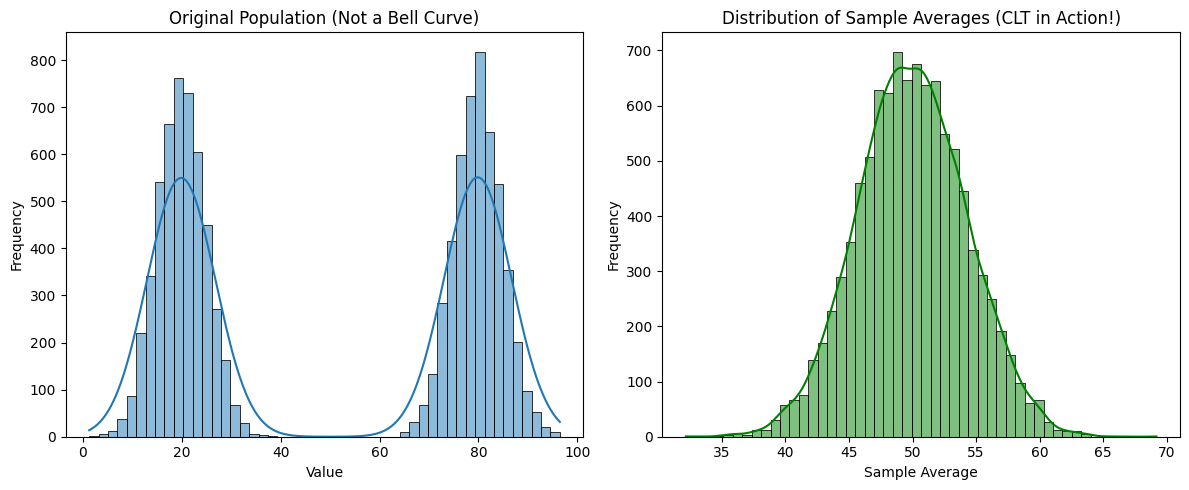

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a weirdly shaped population (U-shaped)
# This is NOT a normal distribution.
np.random.seed(0)
part1 = np.random.normal(loc=20, scale=5, size=5000)
part2 = np.random.normal(loc=80, scale=5, size=5000)
population = np.concatenate([part1, part2])

# Step 2: Take many samples and calculate their averages
sample_means = []
num_samples = 10000
sample_size = 50

for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Step 3: Plot the results
plt.figure(figsize=(12, 5))

# Plot the original population
plt.subplot(1, 2, 1)
sns.histplot(population, bins=50, kde=True)
plt.title('Original Population (Not a Bell Curve)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot the distribution of the sample means
plt.subplot(1, 2, 2)
sns.histplot(sample_means, bins=50, kde=True, color='green')
plt.title('Distribution of Sample Averages (CLT in Action!)')
plt.xlabel('Sample Average')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()